# Figure 8
A comparison of active site densities measured on this campaign to those measured in Porter, et al. 2022 and calculated in other papers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nX_data = pd.read_csv('/home/users/erinraif/acao_data/inp_data/INP_normalised_by_aerosol.csv',index_col='temp_bin')
nS_data = nX_data[nX_data.columns[pd.Series(nX_data.columns).str.endswith('nS')]]

In [3]:
INP_concentrations = pd.read_csv('/home/users/erinraif/acao_data/inp_data/INP_concentrations.csv', index_col='temp_bin')

In [4]:
c279r1_ns_all = INP_concentrations['c279r1t_NT']*1000/3.759e-6
c279r1_ns_dust = INP_concentrations['c279r1t_NT']*1000/1.212e-6

c278r2_ns_all = INP_concentrations['c278r2t_NT']*1000/1.599e-6
c278r2_ns_dust = INP_concentrations['c278r2t_NT']*1000/8.534e-7

In [5]:
# Parametrisations from other papers
def McCluskey(T):
    a = -0.545
    b = 1.0125
    return np.exp(a*T+ b)

def Niemand(T):
    a = -0.517
    b = 8.934
    return np.exp(a*T+ b)

def Harrison(T, pct=5):
    log_ns_uc = -3.25 - 0.793 * T - 0.0691 * T**2 - 0.00417 * T**3 - 0.000105 * T**4 - 9.08e-7 * T**5
    ns_uc = 10**log_ns_uc
    return ns_uc * 1e4 / (100/pct)

def OSullivan(T):
    T = T+273.15
    ln_ns = 0.00297 * T**2 - 2.160 * T + 366.3
    return np.exp(ln_ns)*1e4

def Steinke(T):
    T = T+273.15
    a = 110.266
    b = -0.350
    return np.exp(a+b*T)

def Chen(T):
    a = -0.425
    b = 9.496
    return np.exp(a*T+b)

def Chen(T):
    a = -0.425
    b = 9.496
    return np.exp(a*T+b)

def SanchezMarroquinIceland(T):
    return 10**(-0.0337 - 0.199*T) * 1e4
    
def plot_parametrisation(t_max, t_min, param, ax, **kwargs):
    temps_range = np.linspace(t_max, t_min)
    vals = param(temps_range)
    ax.plot(temps_range, vals, **kwargs)

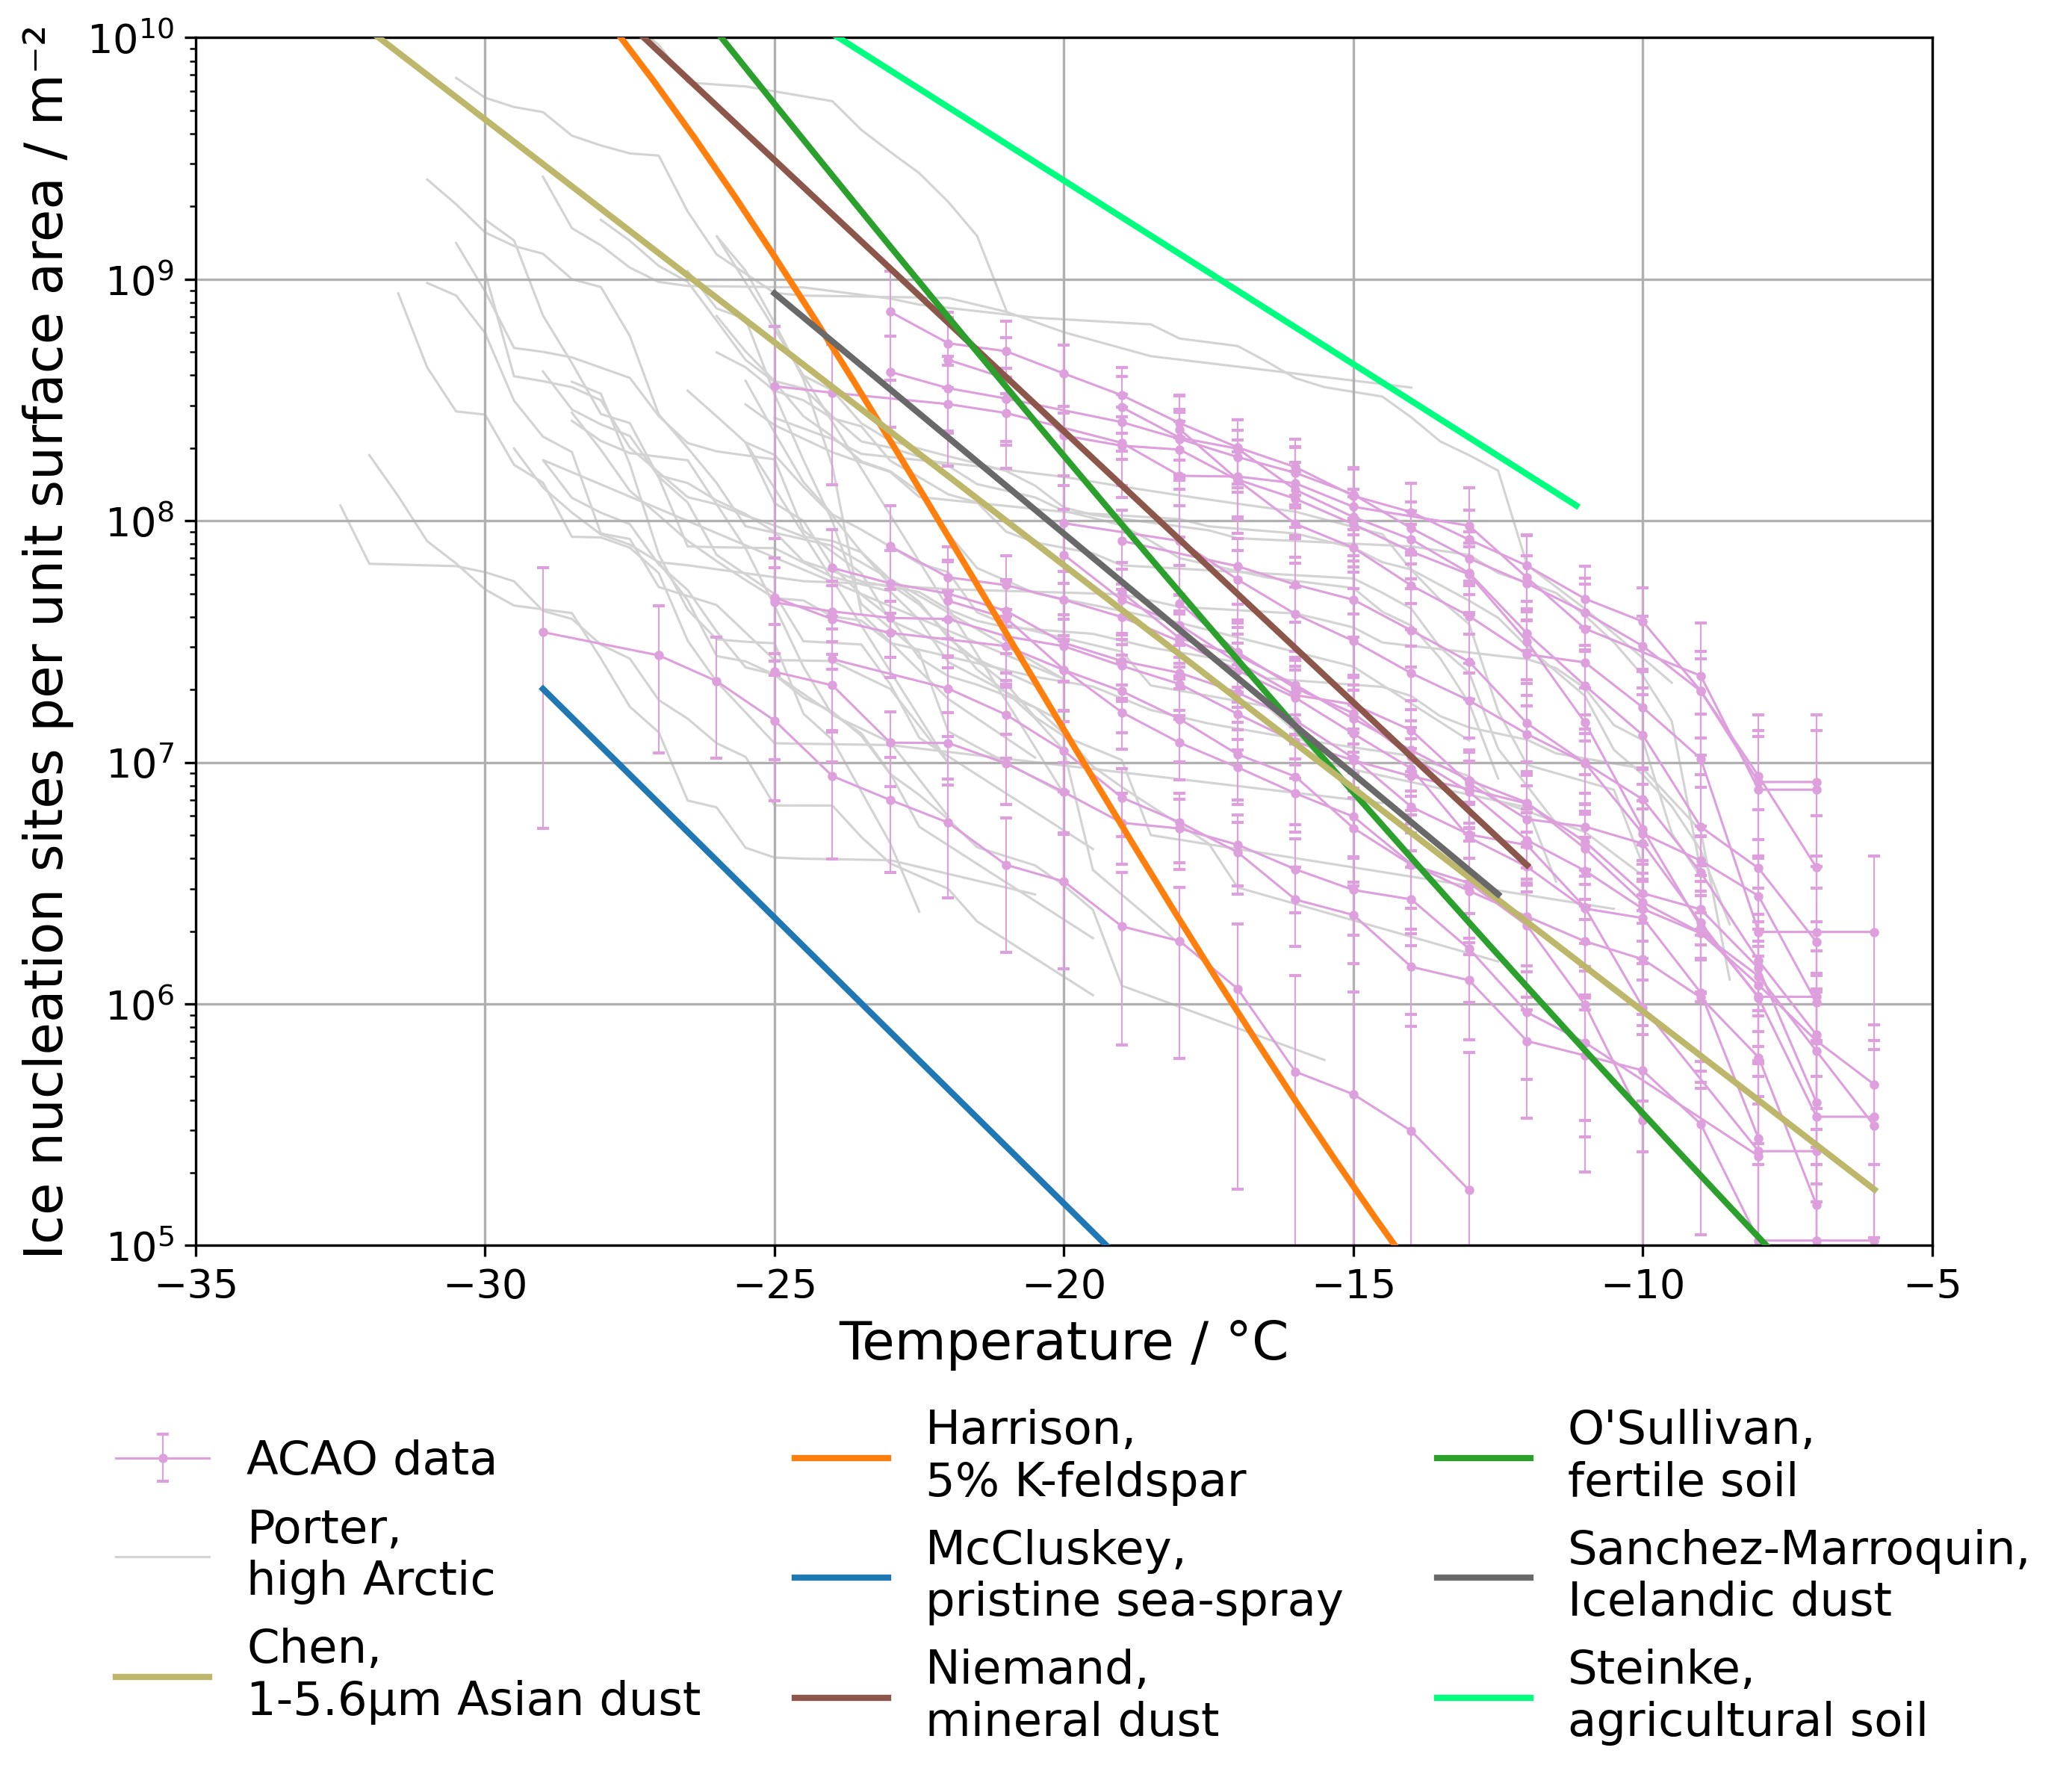

In [6]:
temps = nS_data.index
first = True
# Create figure
fig, ax = plt.subplots(figsize=(10,7), dpi=300)
ax.set_yscale('log')
ax.set_xlim([-35,-5])
ax.set_ylim([10**5,10**10])
ax.set_xlabel('Temperature / \u00b0C',fontsize=17)
ax.set_ylabel('Ice nucleation sites per unit surface area / m\u207b\u00b2',fontsize=17)
ax.tick_params(labelsize=13)
ax.grid()
# Loop through nS values for each filter leg and plot
for column in nS_data:
    mask = np.isfinite(nS_data[column])
    err = column +'_err'
    # label only one of these lines
    if first:
        ax.errorbar(temps[mask], nS_data[column][mask],
            yerr=nX_data[err][mask], marker='o', markersize=2,
            color='plum', capsize=2, elinewidth=0.5, linewidth=0.75,
            zorder=2, label = 'ACAO data')
        first = False
    else:
        ax.errorbar(temps[mask], nS_data[column][mask],
            yerr=nX_data[err][mask], marker='o', markersize=2,
            color='plum', capsize=2, elinewidth=0.5, linewidth=0.75,
            zorder=2)
# Plot parametrisations
plot_parametrisation(-3.5, -37.5, Harrison, ax,
                     label='Harrison,\n5% K-feldspar', linewidth=2, zorder=4,
                     color='tab:orange')
plot_parametrisation(-10, -29, McCluskey, ax,
                     label='McCluskey,\npristine sea-spray', linewidth=2, zorder=4,
                     color='tab:blue')
plot_parametrisation(-12, -30, Niemand, ax,
                     label='Niemand,\nmineral dust', linewidth=2, zorder=4,
                     color='tab:brown')
plot_parametrisation(-6.15, -27.15, OSullivan, ax,
                     label='O\'Sullivan,\nfertile soil', linewidth=2, zorder=4,
                     color='tab:green')
plot_parametrisation(-11.15, -26.15, Steinke, ax,
                     label='Steinke,\nagricultural soil', linewidth=2, zorder=4,
                     color='springgreen')

plot_parametrisation(-6,-35,Chen,ax,
                     label='Chen,\n1-5.6μm Asian dust', linewidth=2, zorder=4,
                     color='darkkhaki')

plot_parametrisation(-12.5,-25,SanchezMarroquinIceland,ax,
                     label='Sanchez-Marroquin,\nIcelandic dust', linewidth=2,zorder=4,
                     color='dimgray')
# Plot the Porter 2022 high Arctic data.
porter_data = pd.read_csv('/home/users/erinraif/acao_data/other_campaigns/porter22ns_v2.csv',
                   header=None)

# Get the number of columns in the CSV file.
num_columns = porter_data.shape[1]

# Create a list to store pairs of x and y columns.
column_pairs = [(porter_data.iloc[:, i], porter_data.iloc[:, i+1])
                    for i in range(0, num_columns, 2)]

first = True
for x_data, y_data in column_pairs:
    if first:
        ax.plot(x_data, y_data, color='lightgray', linewidth=0.75, zorder=1,
                label='Porter,\nhigh Arctic')
        first=False
    else:
        ax.plot(x_data, y_data, color='lightgray', linewidth=0.75, zorder=1)

# Create leend and order logically
ax.legend()
handles, labels = ax.get_legend_handles_labels()
order = [8,7,5,0,1,2,3,6,4]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          fontsize=15,loc="upper left",frameon=False,bbox_to_anchor=(-0.07,-0.1),ncols=3)
# fig.tight_layout()
fig.savefig('./imgs/f08.pdf', bbox_inches='tight', transparent=True)

In [8]:
# Calculation of equivalent INP concentration of McCluskey parametrisation at T=-15 using our median nS.
McCluskey(-15)*(40.119388951181584e-6)/1000 # m-3 -> L-1


0.00039213432757101755